In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_image(image):
  plt.imshow(image,cmap='binary')
  plt.axis('off')

In [3]:
def show_reconstuctions(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images*1.5,3))

  for image_index in range(n_images):
    #Original Images
    plt.subplot(2,n_images,1+image_index)
    plot_image(X_valid[image_index])
    #Reconstructed Images
    plt.subplot(2,n_images,1+n_images+image_index)
    plot_image(reconstructions[image_index])

In [4]:
encoder_stack = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=[28,28]),
                tf.keras.layers.Dense(100,activation='relu'),
                tf.keras.layers.Dense(30,activation='relu')
             ])

In [5]:
decoder_stack = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100,activation='relu',input_shape=[30]),
                tf.keras.layers.Dense(28*28,activation='sigmoid'),
                tf.keras.layers.Reshape([28,28])
             ])

In [6]:
AE = tf.keras.models.Sequential([encoder_stack,decoder_stack])
AE.compile(loss='binary_crossentropy',optimizer='adam')

In [7]:
#Load Dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#Scale
X_train=training_images / 255.0
X_valid=test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
AE.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 30)                81530     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Load Dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#Scale
X_train=training_images / 255.0
X_valid=test_images/255.0

In [10]:
AE.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 30)                81530     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = AE.fit(X_train,X_train,epochs=10,verbose=2,validation_data=(X_valid,X_valid))

Epoch 1/10
1875/1875 - 7s - loss: 0.3127 - val_loss: 0.2924
Epoch 2/10
1875/1875 - 6s - loss: 0.2864 - val_loss: 0.2870
Epoch 3/10
1875/1875 - 6s - loss: 0.2815 - val_loss: 0.2828
Epoch 4/10
1875/1875 - 6s - loss: 0.2789 - val_loss: 0.2807
Epoch 5/10
1875/1875 - 6s - loss: 0.2774 - val_loss: 0.2799
Epoch 6/10
1875/1875 - 6s - loss: 0.2764 - val_loss: 0.2781
Epoch 7/10
1875/1875 - 6s - loss: 0.2756 - val_loss: 0.2777
Epoch 8/10
1875/1875 - 6s - loss: 0.2751 - val_loss: 0.2771
Epoch 9/10
1875/1875 - 6s - loss: 0.2746 - val_loss: 0.2770
Epoch 10/10
1875/1875 - 6s - loss: 0.2742 - val_loss: 0.2762


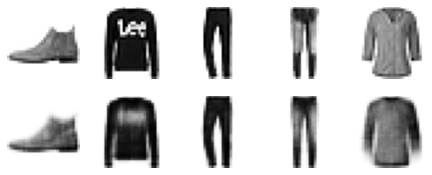

In [12]:
show_reconstuctions(AE)

In [12]:
encoder_stack_Drop50 = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=[28,28]),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(100,activation='relu'),
                tf.keras.layers.Dense(30,activation='relu')
             ])